In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

# Feature selction Information Gain or mutual information on classification problems

#Estimate mutual information for a discrete target variable.
Mutual information (MI) [1] between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances as described in [2] and [3]. Both methods are based on the idea originally proposed in [4].

In [3]:
#Inshort
#a quantity called MI meausres the amount of information one can obtain from random variable.

Univariate feature selection¶
Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method:

In [61]:
#I(x,y)=H(enrtopy x)-H(x/y)  mutual informatin
#information gain also same formula but it takes samles for the calculation

In [5]:
#lets look on example
#wrt to mutual information has differet libraries for regression and classifier

In [33]:
from sklearn.datasets import load_wine
data = load_wine()
df=pd.DataFrame(data.data, columns=data.feature_names)
df['wine']=data.target # Independent variable

In [34]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  wine 

In [19]:
# we can see no missing values and also all are in float and int

In [37]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [38]:
X.shape, y.shape

((178, 13), (178,))

In [44]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=14)

In [45]:
#mutual  classify library
#this library also helps us to find mutual information or correlated values between the variable(+ve number)
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X_train,y_train)

In [46]:
mutual_info

array([0.43271335, 0.35411414, 0.10065044, 0.17616215, 0.11739856,
       0.47665348, 0.71082324, 0.05621428, 0.29851781, 0.5920259 ,
       0.42731282, 0.53862973, 0.47150576])

In [47]:
mutual_data=pd.Series(mutual_info,index=X_train.columns)
mutual_data.sort_values(ascending=False)

flavanoids                      0.710823
color_intensity                 0.592026
od280/od315_of_diluted_wines    0.538630
total_phenols                   0.476653
proline                         0.471506
alcohol                         0.432713
hue                             0.427313
malic_acid                      0.354114
proanthocyanins                 0.298518
alcalinity_of_ash               0.176162
magnesium                       0.117399
ash                             0.100650
nonflavanoid_phenols            0.056214
dtype: float64

In [43]:
#which are the highest values that are all importnat feature for the data

<AxesSubplot:>

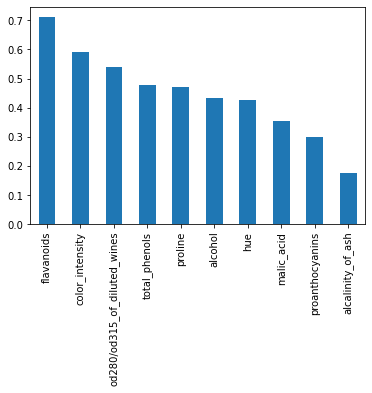

In [49]:
#lets plot in bar graph
mutual_data.nlargest(10).plot(kind='bar')

In [50]:
#to select best features use kbest

In [55]:
from sklearn.feature_selection import SelectKBest
best_features=SelectKBest(mutual_info_classif,k=10)
best_features=best_features.fit(X_train, y_train)
#X_train.columns[best_features.get_support()]

In [60]:
X_train.columns[best_features.get_support()]

Index(['alcohol', 'malic_acid', 'alcalinity_of_ash', 'total_phenols',
       'flavanoids', 'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

# Feature selction Information Gain or mutual information on regression problems

In [64]:
#continous target variable

In [67]:
#load housing dataset
df1=pd.read_csv('E:/train1.csv')

In [68]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [69]:
#we do EDA afterward now will take numeric list for feature selection example

In [71]:
numeric_list=['int64', 'float64']
numeric_columns=list(df1.select_dtypes(include=numeric_list).columns)

In [72]:
numeric_list

['int64', 'float64']

In [73]:
numeric_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [74]:
#need to find out mutual information between the numerical columns

In [75]:
df1=df1[numeric_columns]

In [76]:
df1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [80]:
#we can drop Id column also
#df1.drop('Id', axis=1)

In [81]:
df1.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [82]:
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [84]:
X.shape, y.shape

((1460, 36), (1460,))

In [86]:
#split the data
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=14)

In [90]:
#mutual info regression library
from sklearn.feature_selection import mutual_info_regression

In [91]:
mutual_info=mutual_info_regression(X_train.fillna(0),y_train)

In [92]:
mutual_info

array([0.28608303, 0.18338303, 0.15418293, 0.54753232, 0.12275118,
       0.35273718, 0.28645461, 0.09694812, 0.17225288, 0.01062517,
       0.1128696 , 0.39597865, 0.32756218, 0.21145947, 0.        ,
       0.46010985, 0.03407934, 0.01807169, 0.2561268 , 0.08304112,
       0.05370084, 0.02960517, 0.22225027, 0.16100638, 0.27901973,
       0.38290123, 0.33864151, 0.07284161, 0.17554276, 0.00508056,
       0.00814856, 0.0058769 , 0.01008704, 0.01233004, 0.02474278,
       0.00140185])

In [93]:
mutual_data=pd.Series(mutual_info,index=X_train.columns)
mutual_data.sort_values(ascending=False)

OverallQual      0.547532
GrLivArea        0.460110
TotalBsmtSF      0.395979
GarageCars       0.382901
YearBuilt        0.352737
GarageArea       0.338642
1stFlrSF         0.327562
YearRemodAdd     0.286455
MSSubClass       0.286083
GarageYrBlt      0.279020
FullBath         0.256127
TotRmsAbvGrd     0.222250
2ndFlrSF         0.211459
LotFrontage      0.183383
OpenPorchSF      0.175543
BsmtFinSF1       0.172253
Fireplaces       0.161006
LotArea          0.154183
OverallCond      0.122751
BsmtUnfSF        0.112870
MasVnrArea       0.096948
HalfBath         0.083041
WoodDeckSF       0.072842
BedroomAbvGr     0.053701
BsmtFullBath     0.034079
KitchenAbvGr     0.029605
MoSold           0.024743
BsmtHalfBath     0.018072
MiscVal          0.012330
BsmtFinSF2       0.010625
PoolArea         0.010087
3SsnPorch        0.008149
ScreenPorch      0.005877
EnclosedPorch    0.005081
YrSold           0.001402
LowQualFinSF     0.000000
dtype: float64

<AxesSubplot:>

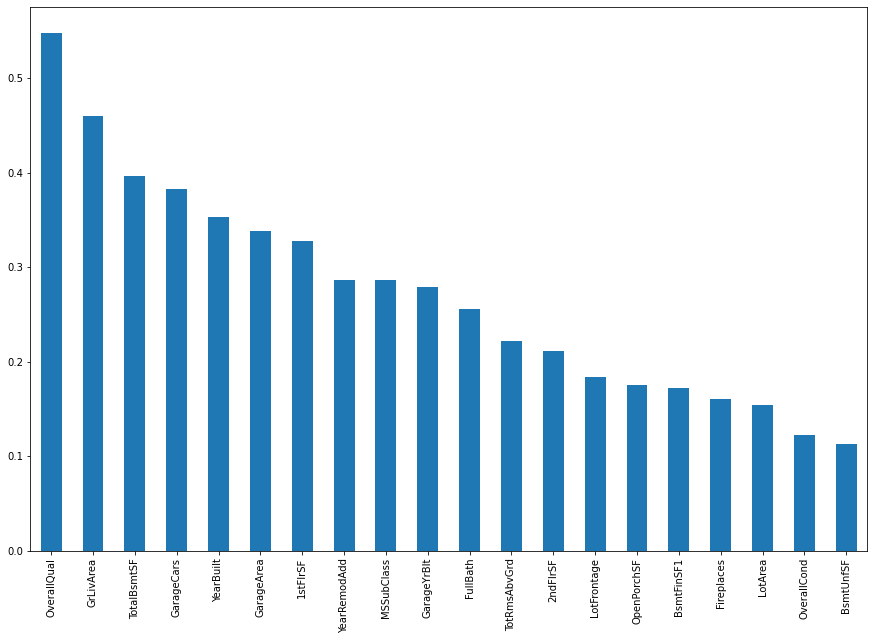

In [97]:
#visualize in bar graph
mutual_data.nlargest(20).plot.bar(figsize=(15,10))


In [98]:
#selct kbest
''from sklearn.feature_selection import SelectKBest
best_features=SelectKBest(mutual_info_classif,k=10)
best_features=best_features.fit(X_train, y_train)
#X_train.columns[best_features.get_support()]''

SyntaxError: invalid syntax (Temp/ipykernel_10500/261954076.py, line 2)

In [99]:
# we can select the features by select percentile also


In [100]:
from sklearn.feature_selection import SelectPercentile

In [102]:
#selcting the top 20 percentile
selct_top_columns=SelectPercentile(mutual_info_regression, percentile=20)
selct_top_columns.fit(X_train.fillna(0),y_train)


SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x0000005893DB7790>)

In [103]:
X_train.columns[selct_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [104]:
selct_top_columns.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

# CHI square test for feature selection

In [105]:
df2=pd.read_csv('G:/train.csv')

In [106]:
df2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [107]:
#split the data
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [130]:
#split the data to avaoid overfit
import pandas as pd
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=14)

In [131]:
#perform chi square test
from sklearn.feature_selection import chi2

In [115]:
chi2
#chi2 retuen two vale Fscore and Pvalue(probabaility value)

<function sklearn.feature_selection._univariate_selection.chi2(X, y)>

In [132]:
f_p_values=chi2(X_train, y_train)

In [133]:
f_p_values # 1st array is fscore-more the higher  fscore feature is importnat
#lesser the P_value -feature is important

(array([3.25354218e+00, 2.38074450e+01, 6.34263532e-01, 1.56933938e+01,
        3.08709693e+01, 1.08556232e+01, 4.53556507e+01, 1.07727838e+00,
        7.72253146e+00, 7.04339503e+01, 3.51127987e+00, 1.53130130e+01,
        1.10711274e+04]),
 array([1.96563235e-01, 6.76517439e-06, 7.28234792e-01, 3.91041488e-04,
        1.97903826e-07, 4.39269818e-03, 1.41626846e-10, 5.83541801e-01,
        2.10413500e-02, 5.07530347e-16, 1.72796628e-01, 4.72956808e-04,
        0.00000000e+00]))

In [137]:
p_values=pd.Series(f_p_values[1], index=X_train.columns)

In [129]:
f_score=pd.Series(f_p_values[0], index=X_train.columns)

In [140]:
p_values

alcohol                         1.965632e-01
malic_acid                      6.765174e-06
ash                             7.282348e-01
alcalinity_of_ash               3.910415e-04
magnesium                       1.979038e-07
total_phenols                   4.392698e-03
flavanoids                      1.416268e-10
nonflavanoid_phenols            5.835418e-01
proanthocyanins                 2.104135e-02
color_intensity                 5.075303e-16
hue                             1.727966e-01
od280/od315_of_diluted_wines    4.729568e-04
proline                         0.000000e+00
dtype: float64

In [142]:
p_values.sort_index(ascending=False)

total_phenols                   4.392698e-03
proline                         0.000000e+00
proanthocyanins                 2.104135e-02
od280/od315_of_diluted_wines    4.729568e-04
nonflavanoid_phenols            5.835418e-01
malic_acid                      6.765174e-06
magnesium                       1.979038e-07
hue                             1.727966e-01
flavanoids                      1.416268e-10
color_intensity                 5.075303e-16
ash                             7.282348e-01
alcohol                         1.965632e-01
alcalinity_of_ash               3.910415e-04
dtype: float64

In [145]:
f_score.sort_index(ascending=False)

total_phenols                      10.855623
proline                         11071.127404
proanthocyanins                     7.722531
od280/od315_of_diluted_wines       15.313013
nonflavanoid_phenols                1.077278
malic_acid                         23.807445
magnesium                          30.870969
hue                                 3.511280
flavanoids                         45.355651
color_intensity                    70.433950
ash                                 0.634264
alcohol                             3.253542
alcalinity_of_ash                  15.693394
dtype: float64